In [3]:
import matplotlib.pyplot as plt
import numpy as np

## 从抛硬币开始说起

$$
\hat\theta_{mle}=\frac{\alpha_H}{\alpha_H+\alpha_T}
$$

- 这两次的结果是一样的吗？
    - 抛5次，3heads，2tails => 3/5
    - 抛50次，30heads，20tails => 3/5

## 霍夫丁不等式

$$
P(|\hat\theta-\theta^*|\geq \epsilon)\leq 2e^{-2N\epsilon^2}\\
P(\hat\theta-\theta^*\geq \epsilon)\leq e^{-2N\epsilon^2}\\
$$

- $\theta^*$: true parameters，任给 $\epsilon\gt0$
    - 不等式左边表示的是误差/犯错的概率；
- 刻画的是误差的上界（upper bound）；
- 关于采样次数 $N$ 呈现指数级衰减（exponential decay）

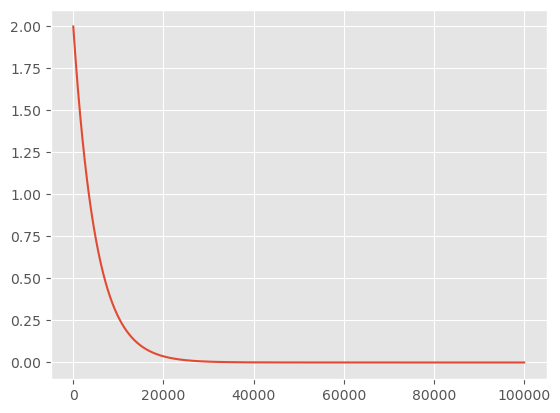

In [9]:
plt.style.use('ggplot')
eps = 1e-2
plt.plot(2*np.exp(-2*np.arange(100000)*eps**2))

## examples

- PAC：Probably Approximate Correct
- 假如说我们想约束我们估计出来的 $\theta$ 与真实的偏差 $\epsilon=0.1$，犯错的概率 $P(|\theta-\theta^*|\geq 0.1)\leq 0.05$，我们应该抛多少次
    - 一个典型的学习理论问题（learning theory），在要求的bound下，我们需要多少的样本；
- 我们记 $\delta=0.05$，则有

$$
P(|\theta-\theta^*|\geq \epsilon)\leq 2e^{-2N\epsilon^2}\\
2e^{-2N\epsilon^2}\leq \delta\\
\Downarrow\\
N\geq \frac{\ln 2-\ln \delta}{2\epsilon^2}
$$



In [7]:
(np.log(2) - np.log(0.05)) / (2*0.1**2)

184.44397270569678

## 从霍夫丁不等式到 UCB

- 不等式是一个天然的计算 bound 的好工具
    - ELBO：VAE

$$
\hat Q(a_t) + \hat U(a_t) => Q(a_t)\\
\Downarrow\\
P(Q(a_t)\leq \hat Q(a_t)+\hat U(a_t))\geq \left(1-p = 1-\exp(-2N(a_t)\hat U(a_t)^2)\right)\\
\Downarrow\\
p=\exp(-2N(a_t)\hat U(a_t)^2)\\
\Downarrow\\
U(a_t)=\sqrt{\frac{-\log p}{2N(a_t)}}, \quad p = \frac1t\\
\Downarrow\\
U(a_t)=\sqrt{\frac{\log t}{2N(a_t)}}
$$